In [1]:
% matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
### Como tengo cvs_train y csv_test concluyo que ya están separados los datos

In [3]:
url_test = "./test.csv"
url_train = "./train.csv"
url_gender ="./gender_submission.csv"

df_test = pd.read_csv(url_test)
df_train = pd.read_csv(url_train)
df_gender = pd.read_csv(url_gender)


In [4]:
print('Cantidad de datos:')
print("Train: ",df_train.shape)
print("Test: ",df_test.shape)

Cantidad de datos:
Train:  (891, 12)
Test:  (418, 11)


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
columns_test = ["Pclas","Sex","Age","Fare"]

In [7]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
columns_target = ["Survived"]

<IPython.core.display.Javascript object>


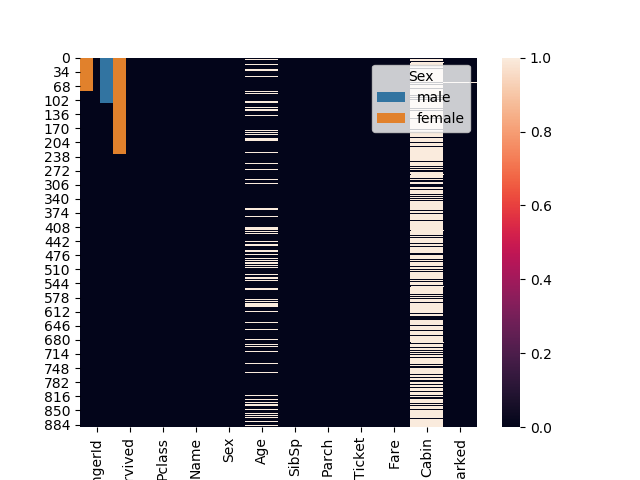

AxesSubplot(0.125,0.11;0.775x0.77)


In [9]:
sobrevivientes = sns.countplot(x ='Survived', hue = 'Sex', data = df_train)
print(sobrevivientes)

In [10]:
nulos = sns.heatmap(df_train.isnull())
print(nulos)

AxesSubplot(0.125,0.11;0.62x0.77)


In [11]:
#Se elimina la columna de "Cabin" ya que tiene muchos datos perdidos
df_train.drop(['Cabin'], axis = 1, inplace=True)
df_test.drop(['Cabin'], axis = 1, inplace=True)

In [12]:
print("Gender:", df_gender)

Gender:      PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         0
391         1283         1
392         1284    

In [13]:
print('Tipos de datos:')
print("Train: ",df_train.info())
print("Test: ",df_test.info())

Tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB
Train:  None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Emb

### Preprocesamiento de datos

In [14]:
#Cambio los datos de sexos en números
df_train['Sex'].replace(['female','male'],[0,1],inplace=True)
df_test['Sex'].replace(['female','male'],[0,1],inplace=True)

In [15]:
#Cambio los datos de embarque en números
df_train['Embarked'].replace(['Q','S','C'],[0,1,2],inplace=True)
df_test['Embarked'].replace(['Q','S','C'],[0,1,2],inplace=True)

In [16]:
print(df_train["Age"].mean())
print(df_train["Age"].mean())

29.69911764705882
29.69911764705882


In [17]:
new_mean = 30

In [18]:
df_train['Age'] = df_train["Age"].replace(np.nan, new_mean)
df_test['Age'] = df_test["Age"].replace(np.nan, new_mean)

In [19]:
df_train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5      30.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17     30.0
18     31.0
19     30.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26     30.0
27     19.0
28     30.0
29     30.0
       ... 
861    21.0
862    48.0
863    30.0
864    24.0
865    42.0
866    27.0
867    31.0
868    30.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878    30.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888    30.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [20]:
#Elimino las columnas que considero que no son necesarias para el analisis
df_train = df_train.drop(['PassengerId','Name','Ticket'], axis=1)
df_test = df_test.drop(['Name','Ticket'], axis=1)


In [21]:
#Se elimina las filas con los datos perdidos
df_train.dropna(axis=0, how='any', inplace=True)
df_test.dropna(axis=0, how='any', inplace=True)

In [22]:
#Verifico los datos
print(pd.isnull(df_train).sum())
print(pd.isnull(df_test).sum())
print(df_train.shape)
print(df_test.shape)
print(df_test.head())
print(df_train.head())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
(889, 8)
(417, 8)
   PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0          892       3    1  34.5      0      0   7.8292         0
1          893       3    0  47.0      1      0   7.0000         1
2          894       2    1  62.0      0      0   9.6875         0
3          895       3    1  27.0      0      0   8.6625         1
4          896       3    0  22.0      1      1  12.2875         1
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500       1.0
1         1       1    0  38.0      1      0  71.2833       2.0
2         1       3    0  26.0      0      0   7.9250       1.0
3         1       1    0  35.0      1      0  53.1

In [31]:
#Separo la columna con la información de los sobrevivientes
X = np.array(df_train.drop(['Survived'], 1))
y = np.array(df_train['Survived'])

In [32]:
X

array([[ 3.    ,  1.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  0.    , 38.    , ...,  0.    , 71.2833,  2.    ],
       [ 3.    ,  0.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  0.    , 30.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  1.    , 26.    , ...,  0.    , 30.    ,  2.    ],
       [ 3.    ,  1.    , 32.    , ...,  0.    ,  7.75  ,  0.    ]])

In [33]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [34]:
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
##Regresión logística
logreg = LogisticRegression()
theta = logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
print('Precisión Regresión Logística:')
print(logreg.score(X_train, y_train))

Precisión Regresión Logística:
0.8087201125175809


In [36]:
theta

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
Y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [38]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [ ]:
def graficar_borde(theta, df_test, df_train):
    # Cargamos datos
    data_arr,tar_arr = cargar_datos()
    
    # Cantidad de datos
    m = np.shape(data_arr)[0]
    
    xcord0 = [] 
    ycord0 = []
    xcord1 = [] 
    ycord1 = []
    
    for i in range(m):
        if int(tar_arr[i])== 1:
            xcord1.append(data_arr[i,1])
            ycord1.append(data_arr[i,2])
        else:
            xcord0.append(data_arr[i,1])
            ycord0.append(data_arr[i,2])
            
    fig = plt.figure()

    ax = fig.add_subplot(111)

    ax.scatter(xcord0, ycord0, s=30, c='red', marker='s')
    ax.scatter(xcord1, ycord1, s=30, c='green')

    ax.legend(['Y1', 'Y0'])

    x = np.arange(-3.0, 3.0, 0.1)
    y = (-theta[0]-theta[1]*x)/theta[2]

    ax.plot(x, y.T)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()